## Using a perceptron to predict whether a house will sell

This code is copied/adapted from Python Machine Learning, by Sebastian Raschka

https://github.com/rasbt/python-machine-learning-book-3rd-edition

In [25]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #self.w_ = np.zeros(1 + X.shape[1]) ###
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(ppn.w_) ###
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [26]:
import pandas as pd

df = pd.read_csv('home-sales-data.csv')
df

,Square Feet,Asking (x1000),Sold in First Week
0,2000,250,1
1,1234,400,-1
2,850,125,1
3,1000,175,1
4,1000,200,-1
5,1600,300,-1


In [27]:
type(df['Square Feet'][0])

numpy.int64

In [28]:
a = df.to_numpy()

In [29]:
a

array([[2000,  250,    1],
       [1234,  400,   -1],
       [ 850,  125,    1],
       [1000,  175,    1],
       [1000,  200,   -1],
       [1600,  300,   -1]])

In [30]:
sold = a[a[:,2] == 1, :2]

In [31]:
sold

array([[2000,  250],
       [ 850,  125],
       [1000,  175]])

In [32]:
unsold = a[a[:,2] == -1, :2]

In [33]:
unsold

array([[1234,  400],
       [1000,  200],
       [1600,  300]])

In [34]:
X = a[:, :2]

In [35]:
X

array([[2000,  250],
       [1234,  400],
       [ 850,  125],
       [1000,  175],
       [1000,  200],
       [1600,  300]])

In [36]:
y = a[:, 2]

In [37]:
y

array([ 1, -1,  1,  1, -1, -1])

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
plt.rcdefaults() 

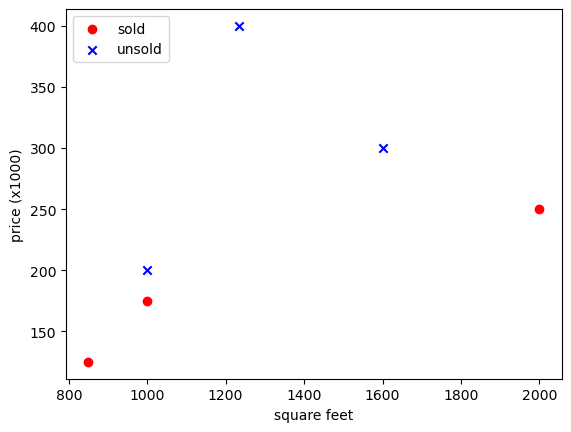

In [39]:
plt.scatter(sold[:, 0], sold[:, 1],
            color='red', marker='o', label='sold')
plt.scatter(unsold[:, 0], unsold[:, 1],
            color='blue', marker='x', label='unsold')

plt.xlabel('square feet')
plt.ylabel('price (x1000)')
plt.legend(loc='upper left')
plt.show()

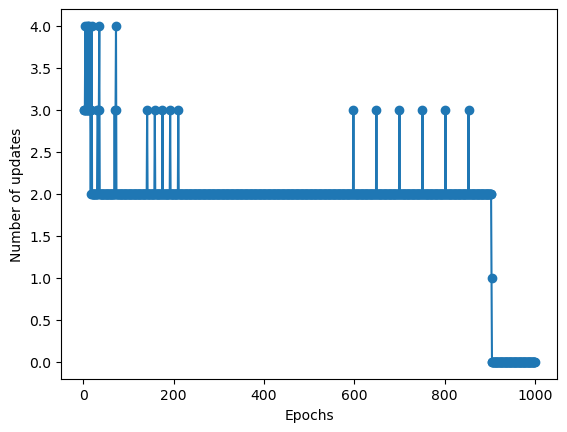

In [40]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#print(ppn.errors_)


In [41]:
ppn.predict(np.array([1800,150]))

array(1)

In [42]:
ppn.predict(np.array([1400,350]))

array(-1)

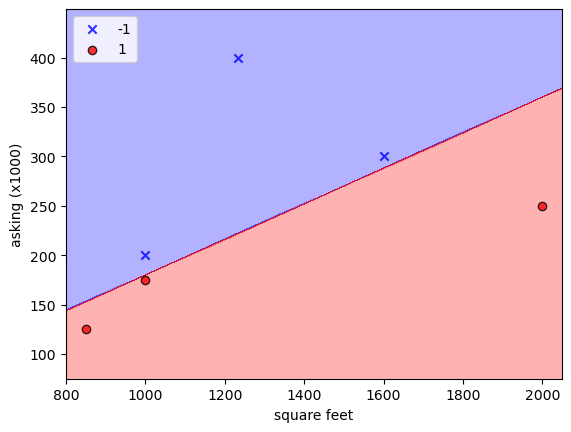

In [43]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=1): ### changed resolution

    # setup marker generator and color map
    markers = ('x', 'o', '^', 'v', 's') ### changed marker order
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan') ### changed color order
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 50, X[:, 0].max() + 50 ### changed margin from 1 to 50
    x2_min, x2_max = X[:, 1].min() - 50, X[:, 1].max() + 50 ### changed margin from 1 to 50
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('square feet') ### changed label
plt.ylabel('asking (x1000)') ### changed label
plt.legend(loc='upper left')

plt.show()